<a href="https://colab.research.google.com/github/veera5423/CleanTech-AI/blob/main/CleanTechV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Libraries
This cell installs the necessary Python libraries for this project, including libraries for numerical operations, data manipulation, plotting, machine learning models, and image processing.

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install scipy
# !pip install tensorflow


### Import Libraries
This cell imports the required libraries and modules that will be used throughout the notebook for tasks such as file operations, image data handling, model building, and image preprocessing.

In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Download Dataset
This cell downloads the "municipal-solid-waste-dataset" from Kaggle using the `kagglehub` library. The dataset is then extracted, and the path to the downloaded files is printed.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elinachen717/municipal-solid-waste-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.81M/4.81M [00:00<00:00, 206MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elinachen717/municipal-solid-waste-dataset/versions/1


### Split Dataset
This cell splits the downloaded dataset into training, validation, and test sets. It creates separate directories for each set and copies the images into their respective class subdirectories.

In [ ]:



dataset_dir = f'{path}/Dataset'
classes = os.listdir(dataset_dir)
#Create directories for train, val, and test sets
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs (os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs (os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)
    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)
    print(cls, len(images))
    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42) # 8.25 * 8.8 = 8.2
    #Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))
print("Dataset split into training, validation, and test sets.")

Trash Images 130
Biodegradable Images 130
Recyclable Images 130
Dataset split into training, validation, and test sets.


### Prepare Data Generators
This cell defines ImageDataGenerators for the training, validation, and test sets. These generators will be used to load images from the directories, apply data augmentation to the training set, and resize images to the required input size for the model.

In [ ]:
#Define directories
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

#Define image size expected by the pre-trained model
IMG_SIZE = (224, 224) # Common size for many models like Reshet, VGG, MobileNet

#Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator (rescale=1./255)

#Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical' # Assuming categorical classification for multiple classes
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Do not shuffle test data
)
#Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 234 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}


### Display Sample Images
These cells display a random image from each of the three classes in the training set: 'Biodegradable Images', 'Recyclable Images', and 'Trash Images'. This helps visualize the type of data the model will be trained on.

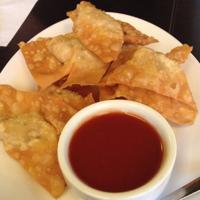

In [ ]:
import random
from IPython.display import Image, display
#a specify the path to your image Folder folder_path/content/output_dataset/train/Biodegradable Images
# Replace with the actual path to your image folder
folder_path = '/content/output_dataset/train/Biodegradable Images' # Example path, replace with your desired folder

#List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]
# Select a random image from the list
selected_image = random.choice(image_files)
#Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

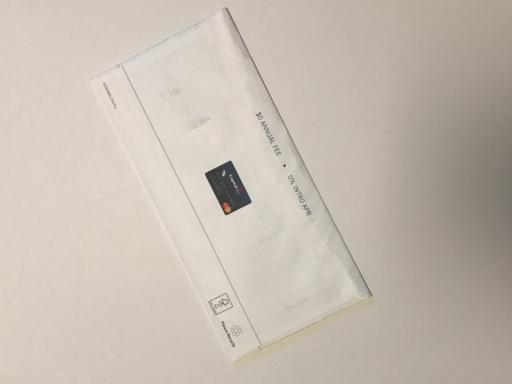

In [ ]:
folder_path = '/content/output_dataset/train/Recyclable Images' # Example path, replace with your desired folder

#List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]
# Select a random image from the list
selected_image = random.choice(image_files)
#Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

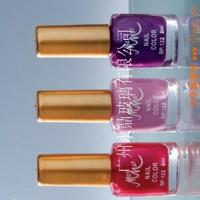

In [ ]:
folder_path = '/content/output_dataset/train/Trash Images' # Example path, replace with your desired folder

#List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]
# Select a random image from the list
selected_image = random.choice(image_files)
#Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

### Define Data Paths
This cell defines the paths to the training and test directories of the dataset.

**Splitting**

In [ ]:
trainpath = "/content/output_dataset/train"
testpath="/content/output_dataset/test"

### Initialize ImageDataGenerators (Alternative)
This cell initializes ImageDataGenerators for training and testing. The training generator includes data augmentation techniques like zooming and shearing, while the test generator only rescales the images.

In [ ]:
train_datagen =ImageDataGenerator (rescale = 1./255, zoom_range= 0.2, shear_range= 0.2)
test_datagen =ImageDataGenerator (rescale = 1./255)

### Load Images with Generators
This cell loads images from the training and test directories using the initialized ImageDataGenerators. It sets the target size for images and the batch size for training and testing.

In [ ]:
train = train_datagen.flow_from_directory (trainpath, target_size = (224,224), batch_size = 20)
test= test_datagen.flow_from_directory (testpath, target_size = (224,224), batch_size = 20)

Found 234 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


### Load VGG16 Model
This cell loads the pre-trained VGG16 convolutional neural network model. `include_top=False` is specified to exclude the final classification layer, allowing us to add our own custom classification layers for our specific task.

In [ ]:
#model
vgg = VGG16(include_top=False, input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Print VGG16 Layers
This cell iterates through and prints the names of the layers in the loaded VGG16 model.

In [ ]:
for layers in vgg.layers:
  print(layers)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
# x=Flatten()(vgg.output)

### Add Custom Classification Layer
This cell adds a Flatten layer followed by a Dense layer with 3 units (for the 3 classes: Biodegradable, Recyclable, Trash) and a 'softmax' activation function to the output of the VGG16 model. This creates the new classification head for our model.

In [ ]:
output=Dense(3,activation='softmax')(Flatten()(vgg.output)) # Apply Flatten directly

### Create the Final Model
This cell creates the final model by combining the pre-trained VGG16 base model with the newly added classification layers.

In [ ]:
vgg16=Model(vgg.input,output)

### Summarize the Model Architecture
This cell prints a summary of the final model's architecture, including the layers, output shapes, and the number of parameters.

In [ ]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 14,789,955 (56.42 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the Model
This cell compiles the VGG16 model using the Adam optimizer and categorical crossentropy loss. It also includes an EarlyStopping callback to prevent overfitting. The model is then trained using the training data generator and validated on the test data generator.

In [ ]:
# ---model Training-----------

from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt=Adam(learning_rate=0.0001)

#defining early stopping callback
early_stopping=EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)

#compile the model
vgg16.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

#Train the model with early stopping callback
history=vgg16.fit(train,validation_data=test,epochs=10,callbacks=[early_stopping])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.4741 - loss: 0.9699 - val_accuracy: 0.7051 - val_loss: 0.5732
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.7269 - loss: 0.5196 - val_accuracy: 0.7051 - val_loss: 0.6054
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 408ms/step - accuracy: 0.8575 - loss: 0.3523 - val_accuracy: 0.4615 - val_loss: 1.3611
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.8572 - loss: 0.4540 - val_accuracy: 0.6795 - val_loss: 0.5498


MessageError: Error: credential propagation was unsuccessful

### Define Labels
This cell defines a list of numerical labels corresponding to the classes (0, 1, 2). These will be used to interpret the model's predictions.

In [ ]:
labels=[0,1,2]

### Make a Prediction on a Sample Image
This cell loads a sample image, preprocesses it, and uses the trained model to make a prediction. The raw prediction output (probabilities for each class) is then displayed.

In [ ]:
img_path = "/content/output_dataset/test/Trash Images/trash111.jpeg"
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[2.8559206e-12, 1.5845129e-16, 1.0000000e+00]], dtype=float32)

### Get Predicted Class Label
This cell finds the index of the highest probability in the prediction output and uses that index to retrieve the corresponding class label from the `labels` list.

In [ ]:
labels[np.argmax(preds)]

2

### Evaluate the model on the test set

### Evaluate the model on the test set
This cell evaluates the trained model on the test dataset to determine its performance in terms of loss and accuracy.

In [ ]:
loss, accuracy = vgg16.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7823 - loss: 0.4697
Test Loss: 0.5732
Test Accuracy: 0.7051


### Visualize training history

### Visualize training history
These cells plot the training and validation accuracy and loss over the epochs. This helps to visualize the model's learning progress and identify potential overfitting.

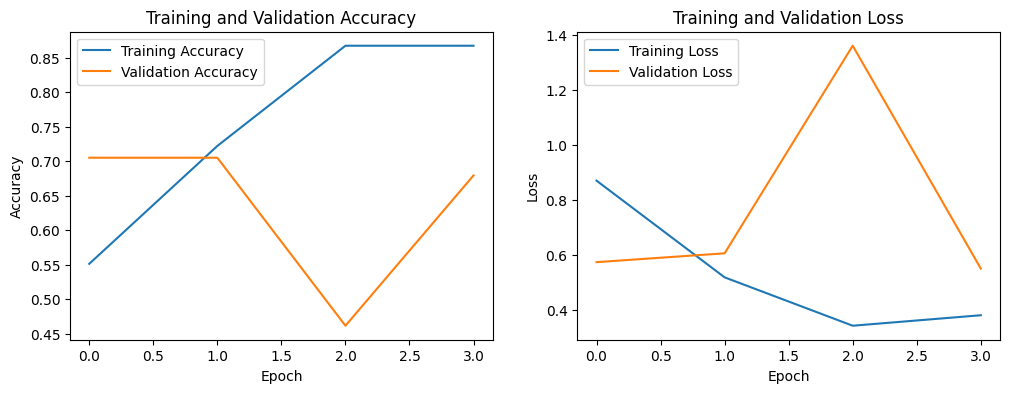

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

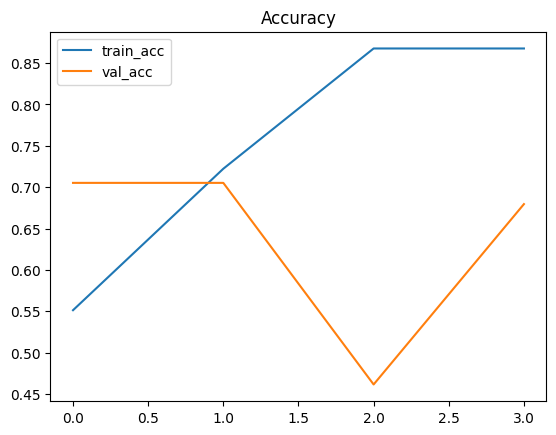

In [ ]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Accuracy")
plt.show()

FileNotFoundError: Cannot find file: waste_classifier.h5

### Save Model and Class Indices
This cell saves the trained VGG16 model to an HDF5 file (`waste_classifier.h5`) and the class indices (mapping between class names and their numerical labels) to a JSON file (`class_indices.json`). These files can be used later to load the trained model and make predictions without retraining.

In [ ]:
# Save the model
vgg16.save("waste_classifier.h5")

# Save class indices to a json file
import json
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)

### Download Model and Class Indices
This cell downloads the saved model file (`waste_classifier.h5`) and the class indices file (`class_indices.json`) to your local machine.

In [ ]:
#model download

from google.colab import files

files.download("waste_classifier.h5")
files.download("class_indices.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>